In [2]:
import fastbook
from fastbook import load_learner
from fastai.vision.widgets import *
fastbook.setup_book()

In [11]:
results = search_images_ddg('tabby cat')
ims = results
len(ims)

200

In [12]:
ims[0]

'https://thecatsite.com/attachments/6c870446-e000-4297-869c-10f143eaa026-jpeg.214130/'

In [13]:
dest = 'images/tabby.jpg'
download_url(ims[0], dest)

Path('images/tabby.jpg')

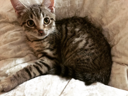

In [14]:
im = Image.open(dest)
im.to_thumb(128,128)

In [102]:
cat_pattern_types = 'Apricot Mackerel Tabby', 'Black Base', ' Blue Base', ' Blue Lynx Point', 'Blue Mink', 'Blue Point', 'Blue Sepia', 'calico', 'Caramel', ' Caramel Tortoiseshell', ' Chocolate Base', ' Chocolate Lynx Point', ' Chocolate Mink', 'Chocolate Mink Tabby', 'Chocolate Point', 'Chocolate Sepia', 'Chocolate Tortoiseshell', 'Cinnamon Colorpoint', ' Cinnamon Lynx Point', 'Cinnamon Sepia', 'Cinnamon Solid', 'Cinnamon Tortoiseshell', 'Classic Blue Tabby', 'Classic Brown Tabby', 'Classic Chocolate Tabby', 'Classic Fawn Tabby', 'Classic Lilac Tabby', 'Classic Red Tabby', 'Classic Silver Tabby', 'Cream Point', 'Cream Tabby', 'dilute calico', 'dilute tortoiseshell', 'Fawn', 'Fawn Tortoiseshell', 'Flame Mink', 'Flame Point', 'Lilac Lynx Point', 'Lilac Point', 'Lilac Solid', 'Lilac Tortoiseshell', 'Mackerel Blue Tabby', 'Mackerel Brown Tabby', 'Mackerel Chocolate Tabby', 'Mackerel Cinnamon Tabby', 'Mackerel Fawn Tabby', 'Mackerel Lilac Tabby', 'Mackerel Red Tabby', 'Mackerel Silver Tabby', 'Natural Mink', 'Natural Mink Tabby', 'Rosette', 'Sable Sepia', 'Seal Lynx Point', 'Seal Point', 'Seal Tabby Point', 'Sepia Tabby', 'Silver Lynx Point', 'Silver Tabby Point', 'Smoke', 'Spotted Blue Tabby', 'Spotted Brown Tabby', 'Spotted Chocolate Tabby', 'Spotted Cinnamon Tabby', 'Spotted Fawn Tabby', 'Spotted Lilac Tabby', 'Spotted Red Tabby', 'Spotted Silver Tabby', 'Ticked Blue Tabby', 'Ticked Brown Tabby', 'Ticked Chocolate Tabby', 'Ticked Cinnamon Tabby', 'Ticked Fawn Tabby', 'Ticked Lilac Tabby', 'Ticked Red Tabby', 'Ticked Silver Tabby', 'torbie', 'Torbie Mink', 'Torbie Point', 'Tortie Point', 'Tortoiseshell', 'Unspecified Blue Tabby', 'Unspecified Chocolate Tabby', 'Unspecified Cinnamon Tabby', 'Unspecified Fawn Tabby', 'Unspecified Lilac Tabby', 'Unspecified Red Tabby', 'Unspecified Silver Tabby', 'White Solid'
path = Path('cat patterns')

In [17]:
if not path.exists():
    path.mkdir()
for o in cat_pattern_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} cat')
    download_images(dest, urls=results)

In [103]:
fns = get_image_files(path)
fns

(#1160) [Path('cat patterns/Apricot Mackerel Tabby/stanley.jpg'),Path('cat patterns/Black Base/01e44716-04a9-4073-b15b-864022d5aba5.jpg'),Path('cat patterns/Black Base/04c17126-c7db-48a9-bbce-74334f8f2b35.jpg'),Path('cat patterns/Black Base/072803fb-dd88-4b48-bcd8-df9e55fe145c.jpg'),Path('cat patterns/Black Base/0760dd63-1eac-47ec-88bb-fd6811b232d4.jpg'),Path('cat patterns/Black Base/09a30e04-c645-4119-b11f-a5a39aea24f1.jpg'),Path('cat patterns/Black Base/0d1dc60f-d45c-47bb-bab2-e853585491bf.png'),Path('cat patterns/Black Base/0e22f6b4-50af-498a-afad-b136fc191b35.jpg'),Path('cat patterns/Black Base/0ef4032d-7eae-45b6-b5f9-8cebd0c80e01.jpeg'),Path('cat patterns/Black Base/106d7cd2-87ab-4e9b-8694-b11367306abf.jpg')...]

In [104]:
failed = verify_images(fns)
failed

(#0) []

In [20]:
failed.map(Path.unlink);

In [114]:
pattern = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [115]:
cats = pattern.new(item_tfms=RandomResizedCrop(224, min_scale=0.3), batch_tfms=aug_transforms())
dls = cats.dataloaders(path)

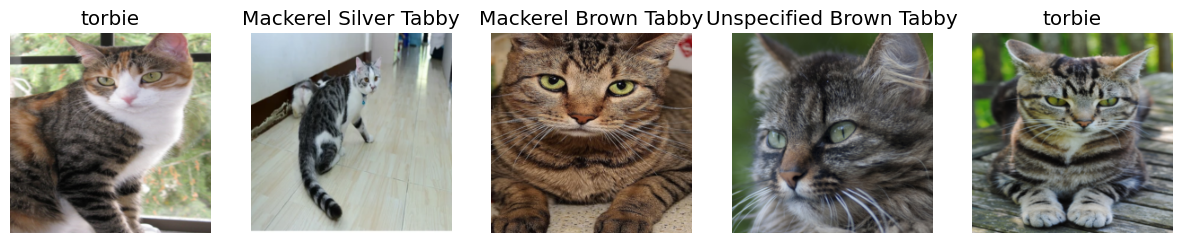

In [117]:
dls.valid.show_batch(max_n=5, nrows=1)

In [92]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

epoch,train_loss,valid_loss,error_rate,time
0,2.090250,0.576558,0.202643,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.969949,0.527852,0.158590,00:24
1,0.852990,0.470794,0.127753,00:24
2,0.753285,0.465091,0.140969,00:24
3,0.657163,0.451730,0.118943,00:24
4,0.581233,0.431191,0.114537,00:24
5,0.522540,0.463154,0.118943,00:24
6,0.453998,0.447481,0.114537,00:24
7,0.406471,0.460293,0.110132,00:24
8,0.368178,0.478587,0.110132,00:24
9,0.319720,0.472586,0.110132,00:24


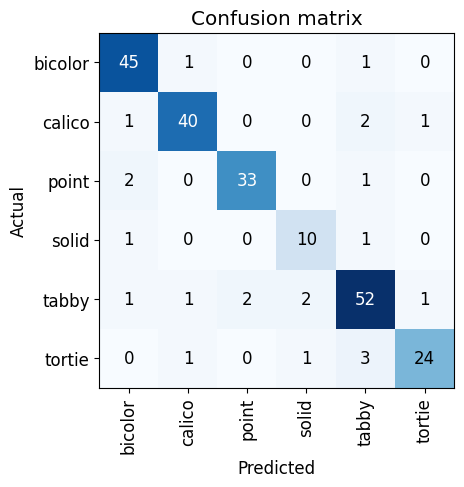

In [93]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

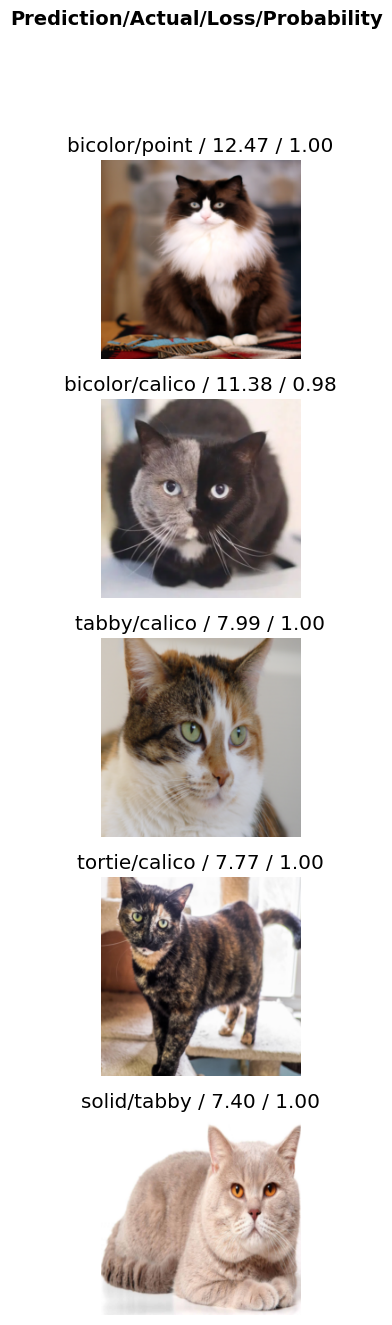

In [94]:
interp.plot_top_losses(5, nrows=5)

In [95]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [72]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [4]:
learn = load_learner('export.pkl')

In [6]:
learn.save('Cat_pattern_classifier_model')

Path('models/Cat_pattern_classifier_model.pth')

In [5]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [ ]:
import gradio as gr
gr.Interface(fn=predict, 
             inputs='image', 
             outputs='label',
             title = 'Cat Coat Pattern Classifier',
             description = 'A computer vision classifier that can tell you which of the major coat patterns your cat has! Extra fancy coat patterns to follow.',
             examples = [r'cat patterns\1200px-British_shorthair_cat-3113513.jpg', r'cat patterns\Domestic_cat_sleeping.JPG', r'cat patterns\calico cat.jpg']).launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://19490b9696ee05f788.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [123]:
labels

['bicolor', 'calico', 'point', 'solid', 'tabby', 'tortie']

In [8]:
from huggingface_hub import push_to_hub_fastai

repo_id = "KathrynMercer/CatPatternClassifier"
push_to_hub_fastai (learner = learn, repo_id=repo_id)

model.pkl:   0%|          | 0.00/47.0M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/KathrynMercer/CatPatternClassifier/commit/59bac4d0cdc25a42aefdc2e6b9c2def7b70c520a', commit_message='Push FastAI model using huggingface_hub.', commit_description='', oid='59bac4d0cdc25a42aefdc2e6b9c2def7b70c520a', pr_url=None, pr_revision=None, pr_num=None)

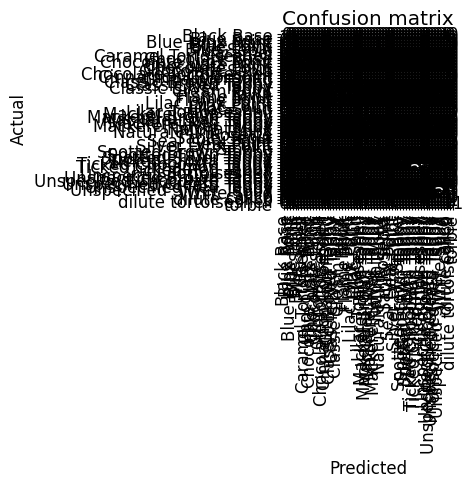

In [120]:
learner = vision_learner(dls, resnet34, metrics = error_rate)
learner.fine_tune(30)
interp = ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=5)